In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True


In [2]:
USdata = pd.read_csv('data/iOverlander Places -  2020-08-25_campgrounds.csv')

In [3]:
USdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   1012 non-null   object 
 1   Name                       3883 non-null   object 
 2   Category                   3883 non-null   object 
 3   Description                3882 non-null   object 
 4   Latitude                   3883 non-null   float64
 5   Longitude                  3883 non-null   float64
 6   Altitude                   3780 non-null   float64
 7   Date verified              3883 non-null   object 
 8   Open                       3883 non-null   object 
 9   Electricity                3883 non-null   object 
 10  Wifi                       3883 non-null   object 
 11  Kitchen                    3883 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 3883 non-null   objec

In [4]:
USdata["Category"].unique()

array(['Established Campground'], dtype=object)

In [5]:
USdata_need_loc = USdata[pd.isna(USdata['Location'])].copy()

In [6]:
USdata_need_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 402 to 3882
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   0 non-null      object 
 1   Name                       2871 non-null   object 
 2   Category                   2871 non-null   object 
 3   Description                2871 non-null   object 
 4   Latitude                   2871 non-null   float64
 5   Longitude                  2871 non-null   float64
 6   Altitude                   2798 non-null   float64
 7   Date verified              2871 non-null   object 
 8   Open                       2871 non-null   object 
 9   Electricity                2871 non-null   object 
 10  Wifi                       2871 non-null   object 
 11  Kitchen                    2871 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 2871 non-null   obj

In [7]:
USdata_has_loc = USdata[~pd.isna(USdata['Location'])].copy()

In [8]:
USdata_has_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1423
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   1012 non-null   object 
 1   Name                       1012 non-null   object 
 2   Category                   1012 non-null   object 
 3   Description                1011 non-null   object 
 4   Latitude                   1012 non-null   float64
 5   Longitude                  1012 non-null   float64
 6   Altitude                   982 non-null    float64
 7   Date verified              1012 non-null   object 
 8   Open                       1012 non-null   object 
 9   Electricity                1012 non-null   object 
 10  Wifi                       1012 non-null   object 
 11  Kitchen                    1012 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 1012 non-null   objec

In [9]:
USdata_has_loc.head()

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center
0,"Borrego Salton Seaway, Borrego Springs, CA 920...",Arroyo Salado Camping,Established Campground,"Free with two vault toilets, nothing else exis...",33.2802,-116.1458,0.0000,2020-02-16 14:20:45 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,"Stateline Campground Rd, Kanab, UT 84741, USA",State Line Campground,Established Campground,Cute free BLM camping in near TH baths.,37.0013,-112.0356,0.0000,2019-09-29 09:53:41 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,No,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,"Glenn Hwy, Glennallen, AK 99588, USA",Tolsona River RV Park and Campground,Established Campground,An old standby for us. Multiple sites for lar...,62.0954,-145.9805,0.0000,2016-05-27 11:38:27 UTC,Yes,Unknown,Unknown,Unknown,nan,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,"Beverly Beach State Park, Newport, OR 97365, USA",Beverly Beach State Park,Established Campground,This is a great beach for a first night on the...,44.7288,-124.0555,0.0000,2020-02-07 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,"Cottell Ln, Coos Bay, OR 97420, USA",Sunset Bay State Park,Established Campground,"Another night, another campground. Full hooku...",43.3308,-124.3707,2.6656,2020-06-27 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
# keep only the ones with state abbreviation
USdata_has_loc = USdata_has_loc[USdata_has_loc['Location'].str.contains('\s[A-Z]{2}\s', case=True, regex=True)]

In [11]:
USdata_has_loc['zip_code'] = ''

In [12]:
# set state
USdata_has_loc['State'] = USdata_has_loc['Location'].str.extract(r'(\s[A-Z]{2}\s)')

In [13]:
USdata_has_loc.head()

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,zip_code,State
0,"Borrego Salton Seaway, Borrego Springs, CA 920...",Arroyo Salado Camping,Established Campground,"Free with two vault toilets, nothing else exis...",33.2802,-116.1458,0.0000,2020-02-16 14:20:45 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,CA
1,"Stateline Campground Rd, Kanab, UT 84741, USA",State Line Campground,Established Campground,Cute free BLM camping in near TH baths.,37.0013,-112.0356,0.0000,2019-09-29 09:53:41 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,No,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,UT
2,"Glenn Hwy, Glennallen, AK 99588, USA",Tolsona River RV Park and Campground,Established Campground,An old standby for us. Multiple sites for lar...,62.0954,-145.9805,0.0000,2016-05-27 11:38:27 UTC,Yes,Unknown,Unknown,Unknown,nan,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,AK
3,"Beverly Beach State Park, Newport, OR 97365, USA",Beverly Beach State Park,Established Campground,This is a great beach for a first night on the...,44.7288,-124.0555,0.0000,2020-02-07 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,OR
4,"Cottell Ln, Coos Bay, OR 97420, USA",Sunset Bay State Park,Established Campground,"Another night, another campground. Full hooku...",43.3308,-124.3707,2.6656,2020-06-27 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,OR


In [14]:
# now pull state and zip for rows without it
import os
G_MAPS_API = os.environ.get("GOOGLE_STATICMAPS_API")
import random, time
import googlemaps
gmaps = googlemaps.Client(G_MAPS_API)
n_requests = 0

In [15]:
def get_state_zip(df):
    '''
    gets zip code and state and inserts into df
    '''
    zips = []
    states = []
    
    global n_requests
    
    for i, site in df.iterrows():
        result = None
        print(f'Pulling request {i}, total API requests so far = {n_requests}')
        
        # get latlong in right format
        # temp save coords
        lat = str(site['Latitude'])
        long = str(site['Longitude'])
        latlong = lat + ',' + long
        #rint(latlong)
        # get geocode data
        res_type = 'postal_code' # administrative_area_level_1|
        result = gmaps.reverse_geocode(latlong, result_type=res_type)
        # increase counter
        n_requests += 1
        #rint(result)
        if result:
            # pull out things we need
            zip_code = result[0]['address_components'][0]['short_name']
            # sometimes the index isn't the same
            #state = result[0]['address_components'][3]['short_name']
            types = ['administrative_area_level_1', 'political']
            statethingy = [d.items() for d in result[0]['address_components'] if d['types'] == types]
            # sometimes there isn't this type (like Puerto Rico)
            #print(statethingy)
            if statethingy:
                state = [x[1] for x in statethingy[0] if x[0] == 'short_name'][0]
    #             for item in statethingy[0]:
    #                 if item[0] == 'short_name':
    #                     state = item[1]
            else:
                # if it didn't work for this row
                zip_code = ''
                state = ''
        else:
            # if it didn't work for this row
            zip_code = ''
            state = ''
        
        # append
        zips.append(zip_code)
        states.append(state)
        
        # wait a bit before next request
        wait_time = random.randint(1, 3)
        print(f'waiting for: {wait_time} seconds')
        time.sleep(wait_time) # in seconds
    
    return zips, states

In [16]:
zips, states = get_state_zip(USdata_need_loc)

Pulling request 402, total API requests so far = 0
waiting for: 1 seconds
Pulling request 403, total API requests so far = 1
waiting for: 3 seconds
Pulling request 921, total API requests so far = 2
waiting for: 1 seconds
Pulling request 922, total API requests so far = 3
waiting for: 2 seconds
Pulling request 935, total API requests so far = 4
waiting for: 1 seconds
Pulling request 936, total API requests so far = 5
waiting for: 3 seconds
Pulling request 937, total API requests so far = 6
waiting for: 2 seconds
Pulling request 938, total API requests so far = 7
waiting for: 2 seconds
Pulling request 939, total API requests so far = 8
waiting for: 3 seconds
Pulling request 940, total API requests so far = 9
waiting for: 2 seconds
Pulling request 942, total API requests so far = 10
waiting for: 2 seconds
Pulling request 943, total API requests so far = 11
waiting for: 1 seconds
Pulling request 944, total API requests so far = 12
waiting for: 3 seconds
Pulling request 945, total API requ

Pulling request 1054, total API requests so far = 109
waiting for: 1 seconds
Pulling request 1055, total API requests so far = 110
waiting for: 2 seconds
Pulling request 1056, total API requests so far = 111
waiting for: 2 seconds
Pulling request 1057, total API requests so far = 112
waiting for: 1 seconds
Pulling request 1059, total API requests so far = 113
waiting for: 1 seconds
Pulling request 1060, total API requests so far = 114
waiting for: 1 seconds
Pulling request 1061, total API requests so far = 115
waiting for: 1 seconds
Pulling request 1062, total API requests so far = 116
waiting for: 2 seconds
Pulling request 1063, total API requests so far = 117
waiting for: 1 seconds
Pulling request 1064, total API requests so far = 118
waiting for: 2 seconds
Pulling request 1065, total API requests so far = 119
waiting for: 3 seconds
Pulling request 1066, total API requests so far = 120
waiting for: 1 seconds
Pulling request 1067, total API requests so far = 121
waiting for: 3 seconds

Pulling request 1198, total API requests so far = 216
waiting for: 1 seconds
Pulling request 1199, total API requests so far = 217
waiting for: 2 seconds
Pulling request 1200, total API requests so far = 218
waiting for: 1 seconds
Pulling request 1201, total API requests so far = 219
waiting for: 3 seconds
Pulling request 1202, total API requests so far = 220
waiting for: 3 seconds
Pulling request 1203, total API requests so far = 221
waiting for: 3 seconds
Pulling request 1204, total API requests so far = 222
waiting for: 1 seconds
Pulling request 1206, total API requests so far = 223
waiting for: 1 seconds
Pulling request 1208, total API requests so far = 224
waiting for: 3 seconds
Pulling request 1209, total API requests so far = 225
waiting for: 1 seconds
Pulling request 1210, total API requests so far = 226
waiting for: 1 seconds
Pulling request 1211, total API requests so far = 227
waiting for: 1 seconds
Pulling request 1212, total API requests so far = 228
waiting for: 3 seconds

Pulling request 1327, total API requests so far = 323
waiting for: 3 seconds
Pulling request 1328, total API requests so far = 324
waiting for: 2 seconds
Pulling request 1329, total API requests so far = 325
waiting for: 3 seconds
Pulling request 1330, total API requests so far = 326
waiting for: 2 seconds
Pulling request 1332, total API requests so far = 327
waiting for: 2 seconds
Pulling request 1333, total API requests so far = 328
waiting for: 2 seconds
Pulling request 1334, total API requests so far = 329
waiting for: 3 seconds
Pulling request 1335, total API requests so far = 330
waiting for: 2 seconds
Pulling request 1336, total API requests so far = 331
waiting for: 2 seconds
Pulling request 1337, total API requests so far = 332
waiting for: 3 seconds
Pulling request 1338, total API requests so far = 333
waiting for: 1 seconds
Pulling request 1339, total API requests so far = 334
waiting for: 1 seconds
Pulling request 1340, total API requests so far = 335
waiting for: 1 seconds

Pulling request 1442, total API requests so far = 430
waiting for: 3 seconds
Pulling request 1443, total API requests so far = 431
waiting for: 3 seconds
Pulling request 1444, total API requests so far = 432
waiting for: 1 seconds
Pulling request 1445, total API requests so far = 433
waiting for: 3 seconds
Pulling request 1446, total API requests so far = 434
waiting for: 3 seconds
Pulling request 1447, total API requests so far = 435
waiting for: 2 seconds
Pulling request 1448, total API requests so far = 436
waiting for: 3 seconds
Pulling request 1449, total API requests so far = 437
waiting for: 2 seconds
Pulling request 1450, total API requests so far = 438
waiting for: 1 seconds
Pulling request 1451, total API requests so far = 439
waiting for: 1 seconds
Pulling request 1452, total API requests so far = 440
waiting for: 1 seconds
Pulling request 1453, total API requests so far = 441
waiting for: 2 seconds
Pulling request 1454, total API requests so far = 442
waiting for: 2 seconds

Pulling request 1549, total API requests so far = 537
waiting for: 2 seconds
Pulling request 1550, total API requests so far = 538
waiting for: 2 seconds
Pulling request 1551, total API requests so far = 539
waiting for: 1 seconds
Pulling request 1552, total API requests so far = 540
waiting for: 1 seconds
Pulling request 1553, total API requests so far = 541
waiting for: 2 seconds
Pulling request 1554, total API requests so far = 542
waiting for: 3 seconds
Pulling request 1555, total API requests so far = 543
waiting for: 1 seconds
Pulling request 1556, total API requests so far = 544
waiting for: 2 seconds
Pulling request 1557, total API requests so far = 545
waiting for: 1 seconds
Pulling request 1558, total API requests so far = 546
waiting for: 1 seconds
Pulling request 1559, total API requests so far = 547
waiting for: 3 seconds
Pulling request 1560, total API requests so far = 548
waiting for: 2 seconds
Pulling request 1561, total API requests so far = 549
waiting for: 1 seconds

Pulling request 1656, total API requests so far = 644
waiting for: 3 seconds
Pulling request 1657, total API requests so far = 645
waiting for: 1 seconds
Pulling request 1658, total API requests so far = 646
waiting for: 3 seconds
Pulling request 1659, total API requests so far = 647
waiting for: 3 seconds
Pulling request 1660, total API requests so far = 648
waiting for: 2 seconds
Pulling request 1661, total API requests so far = 649
waiting for: 3 seconds
Pulling request 1662, total API requests so far = 650
waiting for: 2 seconds
Pulling request 1663, total API requests so far = 651
waiting for: 1 seconds
Pulling request 1664, total API requests so far = 652
waiting for: 1 seconds
Pulling request 1665, total API requests so far = 653
waiting for: 1 seconds
Pulling request 1666, total API requests so far = 654
waiting for: 2 seconds
Pulling request 1667, total API requests so far = 655
waiting for: 3 seconds
Pulling request 1668, total API requests so far = 656
waiting for: 1 seconds

Pulling request 1763, total API requests so far = 751
waiting for: 2 seconds
Pulling request 1764, total API requests so far = 752
waiting for: 3 seconds
Pulling request 1765, total API requests so far = 753
waiting for: 2 seconds
Pulling request 1766, total API requests so far = 754
waiting for: 1 seconds
Pulling request 1767, total API requests so far = 755
waiting for: 2 seconds
Pulling request 1768, total API requests so far = 756
waiting for: 1 seconds
Pulling request 1769, total API requests so far = 757
waiting for: 1 seconds
Pulling request 1770, total API requests so far = 758
waiting for: 3 seconds
Pulling request 1771, total API requests so far = 759
waiting for: 1 seconds
Pulling request 1772, total API requests so far = 760
waiting for: 1 seconds
Pulling request 1773, total API requests so far = 761
waiting for: 3 seconds
Pulling request 1774, total API requests so far = 762
waiting for: 1 seconds
Pulling request 1775, total API requests so far = 763
waiting for: 3 seconds

Pulling request 1870, total API requests so far = 858
waiting for: 2 seconds
Pulling request 1871, total API requests so far = 859
waiting for: 2 seconds
Pulling request 1872, total API requests so far = 860
waiting for: 1 seconds
Pulling request 1873, total API requests so far = 861
waiting for: 1 seconds
Pulling request 1874, total API requests so far = 862
waiting for: 3 seconds
Pulling request 1875, total API requests so far = 863
waiting for: 3 seconds
Pulling request 1876, total API requests so far = 864
waiting for: 3 seconds
Pulling request 1877, total API requests so far = 865
waiting for: 1 seconds
Pulling request 1878, total API requests so far = 866
waiting for: 2 seconds
Pulling request 1879, total API requests so far = 867
waiting for: 1 seconds
Pulling request 1880, total API requests so far = 868
waiting for: 3 seconds
Pulling request 1881, total API requests so far = 869
waiting for: 1 seconds
Pulling request 1882, total API requests so far = 870
waiting for: 3 seconds

Pulling request 1977, total API requests so far = 965
waiting for: 1 seconds
Pulling request 1978, total API requests so far = 966
waiting for: 2 seconds
Pulling request 1979, total API requests so far = 967
waiting for: 2 seconds
Pulling request 1980, total API requests so far = 968
waiting for: 3 seconds
Pulling request 1981, total API requests so far = 969
waiting for: 2 seconds
Pulling request 1982, total API requests so far = 970
waiting for: 2 seconds
Pulling request 1983, total API requests so far = 971
waiting for: 2 seconds
Pulling request 1984, total API requests so far = 972
waiting for: 1 seconds
Pulling request 1985, total API requests so far = 973
waiting for: 3 seconds
Pulling request 1986, total API requests so far = 974
waiting for: 3 seconds
Pulling request 1987, total API requests so far = 975
waiting for: 2 seconds
Pulling request 1988, total API requests so far = 976
waiting for: 2 seconds
Pulling request 1989, total API requests so far = 977
waiting for: 2 seconds

Pulling request 2083, total API requests so far = 1071
waiting for: 3 seconds
Pulling request 2084, total API requests so far = 1072
waiting for: 3 seconds
Pulling request 2085, total API requests so far = 1073
waiting for: 3 seconds
Pulling request 2086, total API requests so far = 1074
waiting for: 2 seconds
Pulling request 2087, total API requests so far = 1075
waiting for: 1 seconds
Pulling request 2088, total API requests so far = 1076
waiting for: 2 seconds
Pulling request 2089, total API requests so far = 1077
waiting for: 3 seconds
Pulling request 2090, total API requests so far = 1078
waiting for: 1 seconds
Pulling request 2091, total API requests so far = 1079
waiting for: 2 seconds
Pulling request 2092, total API requests so far = 1080
waiting for: 2 seconds
Pulling request 2093, total API requests so far = 1081
waiting for: 1 seconds
Pulling request 2094, total API requests so far = 1082
waiting for: 3 seconds
Pulling request 2095, total API requests so far = 1083
waiting f

Pulling request 2189, total API requests so far = 1177
waiting for: 1 seconds
Pulling request 2190, total API requests so far = 1178
waiting for: 3 seconds
Pulling request 2191, total API requests so far = 1179
waiting for: 2 seconds
Pulling request 2192, total API requests so far = 1180
waiting for: 3 seconds
Pulling request 2193, total API requests so far = 1181
waiting for: 1 seconds
Pulling request 2194, total API requests so far = 1182
waiting for: 3 seconds
Pulling request 2195, total API requests so far = 1183
waiting for: 1 seconds
Pulling request 2196, total API requests so far = 1184
waiting for: 2 seconds
Pulling request 2197, total API requests so far = 1185
waiting for: 2 seconds
Pulling request 2198, total API requests so far = 1186
waiting for: 1 seconds
Pulling request 2199, total API requests so far = 1187
waiting for: 3 seconds
Pulling request 2200, total API requests so far = 1188
waiting for: 3 seconds
Pulling request 2201, total API requests so far = 1189
waiting f

Pulling request 2295, total API requests so far = 1283
waiting for: 3 seconds
Pulling request 2296, total API requests so far = 1284
waiting for: 1 seconds
Pulling request 2297, total API requests so far = 1285
waiting for: 3 seconds
Pulling request 2298, total API requests so far = 1286
waiting for: 3 seconds
Pulling request 2299, total API requests so far = 1287
waiting for: 1 seconds
Pulling request 2300, total API requests so far = 1288
waiting for: 3 seconds
Pulling request 2301, total API requests so far = 1289
waiting for: 3 seconds
Pulling request 2302, total API requests so far = 1290
waiting for: 3 seconds
Pulling request 2303, total API requests so far = 1291
waiting for: 1 seconds
Pulling request 2304, total API requests so far = 1292
waiting for: 1 seconds
Pulling request 2305, total API requests so far = 1293
waiting for: 1 seconds
Pulling request 2306, total API requests so far = 1294
waiting for: 1 seconds
Pulling request 2307, total API requests so far = 1295
waiting f

Pulling request 2401, total API requests so far = 1389
waiting for: 2 seconds
Pulling request 2402, total API requests so far = 1390
waiting for: 3 seconds
Pulling request 2403, total API requests so far = 1391
waiting for: 2 seconds
Pulling request 2404, total API requests so far = 1392
waiting for: 2 seconds
Pulling request 2405, total API requests so far = 1393
waiting for: 3 seconds
Pulling request 2406, total API requests so far = 1394
waiting for: 2 seconds
Pulling request 2407, total API requests so far = 1395
waiting for: 3 seconds
Pulling request 2408, total API requests so far = 1396
waiting for: 2 seconds
Pulling request 2409, total API requests so far = 1397
waiting for: 1 seconds
Pulling request 2410, total API requests so far = 1398
waiting for: 3 seconds
Pulling request 2411, total API requests so far = 1399
waiting for: 1 seconds
Pulling request 2412, total API requests so far = 1400
waiting for: 2 seconds
Pulling request 2413, total API requests so far = 1401
waiting f

Pulling request 2507, total API requests so far = 1495
waiting for: 2 seconds
Pulling request 2508, total API requests so far = 1496
waiting for: 1 seconds
Pulling request 2509, total API requests so far = 1497
waiting for: 3 seconds
Pulling request 2510, total API requests so far = 1498
waiting for: 3 seconds
Pulling request 2511, total API requests so far = 1499
waiting for: 2 seconds
Pulling request 2512, total API requests so far = 1500
waiting for: 2 seconds
Pulling request 2513, total API requests so far = 1501
waiting for: 1 seconds
Pulling request 2514, total API requests so far = 1502
waiting for: 3 seconds
Pulling request 2515, total API requests so far = 1503
waiting for: 2 seconds
Pulling request 2516, total API requests so far = 1504
waiting for: 2 seconds
Pulling request 2517, total API requests so far = 1505
waiting for: 3 seconds
Pulling request 2518, total API requests so far = 1506
waiting for: 1 seconds
Pulling request 2519, total API requests so far = 1507
waiting f

Pulling request 2613, total API requests so far = 1601
waiting for: 3 seconds
Pulling request 2614, total API requests so far = 1602
waiting for: 3 seconds
Pulling request 2615, total API requests so far = 1603
waiting for: 3 seconds
Pulling request 2616, total API requests so far = 1604
waiting for: 2 seconds
Pulling request 2617, total API requests so far = 1605
waiting for: 3 seconds
Pulling request 2618, total API requests so far = 1606
waiting for: 2 seconds
Pulling request 2619, total API requests so far = 1607
waiting for: 1 seconds
Pulling request 2620, total API requests so far = 1608
waiting for: 3 seconds
Pulling request 2621, total API requests so far = 1609
waiting for: 2 seconds
Pulling request 2622, total API requests so far = 1610
waiting for: 3 seconds
Pulling request 2623, total API requests so far = 1611
waiting for: 1 seconds
Pulling request 2624, total API requests so far = 1612
waiting for: 3 seconds
Pulling request 2625, total API requests so far = 1613
waiting f

Pulling request 2719, total API requests so far = 1707
waiting for: 2 seconds
Pulling request 2720, total API requests so far = 1708
waiting for: 2 seconds
Pulling request 2721, total API requests so far = 1709
waiting for: 2 seconds
Pulling request 2722, total API requests so far = 1710
waiting for: 1 seconds
Pulling request 2723, total API requests so far = 1711
waiting for: 2 seconds
Pulling request 2724, total API requests so far = 1712
waiting for: 3 seconds
Pulling request 2725, total API requests so far = 1713
waiting for: 3 seconds
Pulling request 2726, total API requests so far = 1714
waiting for: 3 seconds
Pulling request 2727, total API requests so far = 1715
waiting for: 1 seconds
Pulling request 2728, total API requests so far = 1716
waiting for: 3 seconds
Pulling request 2729, total API requests so far = 1717
waiting for: 1 seconds
Pulling request 2730, total API requests so far = 1718
waiting for: 3 seconds
Pulling request 2731, total API requests so far = 1719
waiting f

Pulling request 2825, total API requests so far = 1813
waiting for: 3 seconds
Pulling request 2826, total API requests so far = 1814
waiting for: 3 seconds
Pulling request 2827, total API requests so far = 1815
waiting for: 3 seconds
Pulling request 2828, total API requests so far = 1816
waiting for: 2 seconds
Pulling request 2829, total API requests so far = 1817
waiting for: 3 seconds
Pulling request 2830, total API requests so far = 1818
waiting for: 1 seconds
Pulling request 2831, total API requests so far = 1819
waiting for: 3 seconds
Pulling request 2832, total API requests so far = 1820
waiting for: 3 seconds
Pulling request 2833, total API requests so far = 1821
waiting for: 1 seconds
Pulling request 2834, total API requests so far = 1822
waiting for: 2 seconds
Pulling request 2835, total API requests so far = 1823
waiting for: 2 seconds
Pulling request 2836, total API requests so far = 1824
waiting for: 2 seconds
Pulling request 2837, total API requests so far = 1825
waiting f

Pulling request 2931, total API requests so far = 1919
waiting for: 3 seconds
Pulling request 2932, total API requests so far = 1920
waiting for: 2 seconds
Pulling request 2933, total API requests so far = 1921
waiting for: 2 seconds
Pulling request 2934, total API requests so far = 1922
waiting for: 3 seconds
Pulling request 2935, total API requests so far = 1923
waiting for: 2 seconds
Pulling request 2936, total API requests so far = 1924
waiting for: 2 seconds
Pulling request 2937, total API requests so far = 1925
waiting for: 1 seconds
Pulling request 2938, total API requests so far = 1926
waiting for: 2 seconds
Pulling request 2939, total API requests so far = 1927
waiting for: 2 seconds
Pulling request 2940, total API requests so far = 1928
waiting for: 2 seconds
Pulling request 2941, total API requests so far = 1929
waiting for: 2 seconds
Pulling request 2942, total API requests so far = 1930
waiting for: 1 seconds
Pulling request 2943, total API requests so far = 1931
waiting f

Pulling request 3037, total API requests so far = 2025
waiting for: 2 seconds
Pulling request 3038, total API requests so far = 2026
waiting for: 1 seconds
Pulling request 3039, total API requests so far = 2027
waiting for: 3 seconds
Pulling request 3040, total API requests so far = 2028
waiting for: 1 seconds
Pulling request 3041, total API requests so far = 2029
waiting for: 1 seconds
Pulling request 3042, total API requests so far = 2030
waiting for: 3 seconds
Pulling request 3043, total API requests so far = 2031
waiting for: 2 seconds
Pulling request 3044, total API requests so far = 2032
waiting for: 2 seconds
Pulling request 3045, total API requests so far = 2033
waiting for: 3 seconds
Pulling request 3046, total API requests so far = 2034
waiting for: 2 seconds
Pulling request 3047, total API requests so far = 2035
waiting for: 3 seconds
Pulling request 3048, total API requests so far = 2036
waiting for: 2 seconds
Pulling request 3049, total API requests so far = 2037
waiting f

Pulling request 3143, total API requests so far = 2131
waiting for: 1 seconds
Pulling request 3144, total API requests so far = 2132
waiting for: 1 seconds
Pulling request 3145, total API requests so far = 2133
waiting for: 2 seconds
Pulling request 3146, total API requests so far = 2134
waiting for: 2 seconds
Pulling request 3147, total API requests so far = 2135
waiting for: 2 seconds
Pulling request 3148, total API requests so far = 2136
waiting for: 1 seconds
Pulling request 3149, total API requests so far = 2137
waiting for: 2 seconds
Pulling request 3150, total API requests so far = 2138
waiting for: 3 seconds
Pulling request 3151, total API requests so far = 2139
waiting for: 1 seconds
Pulling request 3152, total API requests so far = 2140
waiting for: 2 seconds
Pulling request 3153, total API requests so far = 2141
waiting for: 1 seconds
Pulling request 3154, total API requests so far = 2142
waiting for: 1 seconds
Pulling request 3155, total API requests so far = 2143
waiting f

Pulling request 3249, total API requests so far = 2237
waiting for: 1 seconds
Pulling request 3250, total API requests so far = 2238
waiting for: 2 seconds
Pulling request 3251, total API requests so far = 2239
waiting for: 1 seconds
Pulling request 3252, total API requests so far = 2240
waiting for: 3 seconds
Pulling request 3253, total API requests so far = 2241
waiting for: 1 seconds
Pulling request 3254, total API requests so far = 2242
waiting for: 3 seconds
Pulling request 3255, total API requests so far = 2243
waiting for: 3 seconds
Pulling request 3256, total API requests so far = 2244
waiting for: 1 seconds
Pulling request 3257, total API requests so far = 2245
waiting for: 2 seconds
Pulling request 3258, total API requests so far = 2246
waiting for: 2 seconds
Pulling request 3259, total API requests so far = 2247
waiting for: 1 seconds
Pulling request 3260, total API requests so far = 2248
waiting for: 2 seconds
Pulling request 3261, total API requests so far = 2249
waiting f

Pulling request 3355, total API requests so far = 2343
waiting for: 3 seconds
Pulling request 3356, total API requests so far = 2344
waiting for: 3 seconds
Pulling request 3357, total API requests so far = 2345
waiting for: 3 seconds
Pulling request 3358, total API requests so far = 2346
waiting for: 1 seconds
Pulling request 3359, total API requests so far = 2347
waiting for: 1 seconds
Pulling request 3360, total API requests so far = 2348
waiting for: 3 seconds
Pulling request 3361, total API requests so far = 2349
waiting for: 3 seconds
Pulling request 3362, total API requests so far = 2350
waiting for: 1 seconds
Pulling request 3363, total API requests so far = 2351
waiting for: 3 seconds
Pulling request 3364, total API requests so far = 2352
waiting for: 2 seconds
Pulling request 3365, total API requests so far = 2353
waiting for: 1 seconds
Pulling request 3366, total API requests so far = 2354
waiting for: 2 seconds
Pulling request 3367, total API requests so far = 2355
waiting f

Pulling request 3461, total API requests so far = 2449
waiting for: 3 seconds
Pulling request 3462, total API requests so far = 2450
waiting for: 3 seconds
Pulling request 3463, total API requests so far = 2451
waiting for: 3 seconds
Pulling request 3464, total API requests so far = 2452
waiting for: 3 seconds
Pulling request 3465, total API requests so far = 2453
waiting for: 1 seconds
Pulling request 3466, total API requests so far = 2454
waiting for: 1 seconds
Pulling request 3467, total API requests so far = 2455
waiting for: 1 seconds
Pulling request 3468, total API requests so far = 2456
waiting for: 2 seconds
Pulling request 3469, total API requests so far = 2457
waiting for: 3 seconds
Pulling request 3470, total API requests so far = 2458
waiting for: 3 seconds
Pulling request 3471, total API requests so far = 2459
waiting for: 1 seconds
Pulling request 3472, total API requests so far = 2460
waiting for: 2 seconds
Pulling request 3473, total API requests so far = 2461
waiting f

Pulling request 3567, total API requests so far = 2555
waiting for: 1 seconds
Pulling request 3568, total API requests so far = 2556
waiting for: 2 seconds
Pulling request 3569, total API requests so far = 2557
waiting for: 2 seconds
Pulling request 3570, total API requests so far = 2558
waiting for: 1 seconds
Pulling request 3571, total API requests so far = 2559
waiting for: 2 seconds
Pulling request 3572, total API requests so far = 2560
waiting for: 3 seconds
Pulling request 3573, total API requests so far = 2561
waiting for: 3 seconds
Pulling request 3574, total API requests so far = 2562
waiting for: 2 seconds
Pulling request 3575, total API requests so far = 2563
waiting for: 2 seconds
Pulling request 3576, total API requests so far = 2564
waiting for: 1 seconds
Pulling request 3577, total API requests so far = 2565
waiting for: 1 seconds
Pulling request 3578, total API requests so far = 2566
waiting for: 1 seconds
Pulling request 3579, total API requests so far = 2567
waiting f

Pulling request 3673, total API requests so far = 2661
waiting for: 2 seconds
Pulling request 3674, total API requests so far = 2662
waiting for: 2 seconds
Pulling request 3675, total API requests so far = 2663
waiting for: 3 seconds
Pulling request 3676, total API requests so far = 2664
waiting for: 2 seconds
Pulling request 3677, total API requests so far = 2665
waiting for: 2 seconds
Pulling request 3678, total API requests so far = 2666
waiting for: 1 seconds
Pulling request 3679, total API requests so far = 2667
waiting for: 3 seconds
Pulling request 3680, total API requests so far = 2668
waiting for: 1 seconds
Pulling request 3681, total API requests so far = 2669
waiting for: 3 seconds
Pulling request 3682, total API requests so far = 2670
waiting for: 1 seconds
Pulling request 3683, total API requests so far = 2671
waiting for: 2 seconds
Pulling request 3684, total API requests so far = 2672
waiting for: 2 seconds
Pulling request 3685, total API requests so far = 2673
waiting f

Pulling request 3779, total API requests so far = 2767
waiting for: 2 seconds
Pulling request 3780, total API requests so far = 2768
waiting for: 3 seconds
Pulling request 3781, total API requests so far = 2769
waiting for: 3 seconds
Pulling request 3782, total API requests so far = 2770
waiting for: 1 seconds
Pulling request 3783, total API requests so far = 2771
waiting for: 2 seconds
Pulling request 3784, total API requests so far = 2772
waiting for: 2 seconds
Pulling request 3785, total API requests so far = 2773
waiting for: 1 seconds
Pulling request 3786, total API requests so far = 2774
waiting for: 2 seconds
Pulling request 3787, total API requests so far = 2775
waiting for: 3 seconds
Pulling request 3788, total API requests so far = 2776
waiting for: 2 seconds
Pulling request 3789, total API requests so far = 2777
waiting for: 2 seconds
Pulling request 3790, total API requests so far = 2778
waiting for: 1 seconds
Pulling request 3791, total API requests so far = 2779
waiting f

In [17]:
# save
zips_pd = pd.Series(zips, name='zip_codes') 
states_pd = pd.Series(states, name='states') 
zips_pd.to_csv('data/zip_codes_est_campgrounds.csv')
states_pd.to_csv('data/states_est_campgrounds.csv')

In [18]:
# add to df
USdata_need_loc_with_states = USdata_need_loc.copy()
USdata_need_loc_with_states['zip_code'] = zips
USdata_need_loc_with_states['State'] = states

In [19]:
# merge with data with location
dfs = [USdata_has_loc, USdata_need_loc_with_states]
USdata_camgrounds_zip_states_combined = pd.concat(dfs)

In [20]:
USdata_camgrounds_zip_states_combined

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,zip_code,State
0,"Borrego Salton Seaway, Borrego Springs, CA 920...",Arroyo Salado Camping,Established Campground,"Free with two vault toilets, nothing else exis...",33.2802,-116.1458,0.0000,2020-02-16 14:20:45 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,CA
1,"Stateline Campground Rd, Kanab, UT 84741, USA",State Line Campground,Established Campground,Cute free BLM camping in near TH baths.,37.0013,-112.0356,0.0000,2019-09-29 09:53:41 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,No,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,UT
2,"Glenn Hwy, Glennallen, AK 99588, USA",Tolsona River RV Park and Campground,Established Campground,An old standby for us. Multiple sites for lar...,62.0954,-145.9805,0.0000,2016-05-27 11:38:27 UTC,Yes,Unknown,Unknown,Unknown,nan,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,AK
3,"Beverly Beach State Park, Newport, OR 97365, USA",Beverly Beach State Park,Established Campground,This is a great beach for a first night on the...,44.7288,-124.0555,0.0000,2020-02-07 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,OR
4,"Cottell Ln, Coos Bay, OR 97420, USA",Sunset Bay State Park,Established Campground,"Another night, another campground. Full hooku...",43.3308,-124.3707,2.6656,2020-06-27 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,NaN,Cinder Hill Campground,Established Campground,$18/night. MOST Of the campground is by reser...,43.7290,-121.1951,"1,828.7999",2020-08-24 00:00:00 UTC,Yes,No,No,No,nan,No,No,Potable,Pit Toilets,Yes,Yes,Yes,No,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,97739,OR
3879,NaN,Priest Rapids Wilderness Recreation Area,Established Campground,Dry camping along the river in an established ...,47.9963,-122.2122,35.7000,2020-07-27 00:00:00 UTC,Yes,No,No,No,nan,No,No,Potable,Pit Toilets,Unknown,Yes,Yes,No,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,98201,WA
3880,NaN,Milford state park campground,Established Campground,Established campground in the Milford state pa...,39.1154,-96.8958,315.2877,2020-08-08 00:00:00 UTC,Yes,Yes - At Sites,Yes - Fast,No,nan,No,Hot,Potable,Pit Toilets,Yes,Yes,Yes,Yes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,66514,KS
3881,NaN,Flasher Centennial Campground,Established Campground,City campground in the town of Flasher. An une...,46.4527,-101.2335,585.1897,2020-08-24 00:00:00 UTC,Yes,Yes - At Sites,Unknown,No,nan,No,No,Potable,No,Yes,Yes,Yes,Yes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,58535,ND


In [22]:
# check state format
USdata_camgrounds_zip_states_combined['State'].unique()
USdata_camgrounds_zip_states_combined['State'] = USdata_camgrounds_zip_states_combined['State'].str.strip()
USdata_camgrounds_zip_states_combined['State'].unique()

array(['CA', 'UT', 'AK', 'OR', 'WA', 'WV', 'MD', 'MT', 'AZ', 'SE', 'NV',
       'CO', 'NM', 'TX', 'TN', 'KY', 'FL', 'ME', 'NC', 'VA', 'IL', 'SD',
       'NE', 'OH', 'WY', 'AR', 'MI', 'ID', 'MS', 'OK', 'GA', 'AL', 'LA',
       'SC', 'NY', 'VT', 'KS', 'MO', 'RV', 'US', 'NW', 'PA', 'WI', 'MA',
       'MN', 'NJ', 'SW', 'ND', 'IN', 'HI', 'IA', 'AB', 'NH', 'YT', 'DE',
       '', 'CT', 'BC', 'RI', 'N.L.', 'NB'], dtype=object)

In [23]:
# save csv, next we will pull sat images
USdata_camgrounds_zip_states_combined.to_csv('data/USdata_est_campgrounds_zip_states_combined.csv')

In [30]:
USdata_camgrounds_zip_states_combined = pd.read_csv('data/USdata_est_campgrounds_zip_states_combined.csv')

In [24]:
def download_images(client, df, zoomlevel, max_requests=10, prefix="", out_path="data/"):
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    
    global n_requests
    
    for i, site in df.iterrows():
        print(f'Pulling image {i}, total API requests so far = {n_requests}')
        #print(f"{site['Latitude']}, {site['Longitude']}")
        
        # temp save coords
        lat = site['Latitude']
        long = site['Longitude']
        
        # and tags for site
        cat = site['Category']
        
        # create filename
        cur_filename = f'satimg_{prefix}_{i}_{cat}_{zoomlevel}_{lat}_{long}.png'
        print(cur_filename)

        # if it already exists, skip to next
        if os.path.exists(out_path + cur_filename):
            continue

        # get the image
        satimg = client.static_map(size = (400, 400), # pixels
           zoom = zoomlevel, # 1-21
           center = (lat, long),
           scale = 1, # default is 1, 2 returns 2x pixels for high res displays
           maptype = "satellite",
           format = "png"
          )
        
        # if it didn't work, exit
        if satimg is None or n_requests >= max_requests:
            print("API requests quota exceeded!")    
            break
        # increase counter otherwise
        n_requests += 1
        
        # save the current image
        f = open(out_path + cur_filename, 'wb')
        for chunk in satimg:
            if chunk:
                f.write(chunk)
        f.close()
        
        # open it to crop the text off
        img = plt.imread(out_path + cur_filename)
        # maybe crop all 4 sides?
        cropped = img[25:375, 25:375]
        # and resave
        #cropped_filename = f'satimg_{i}_{cat}_{zoomlevel}_{lat}_{long}.png'
        plt.imsave(out_path + cur_filename, cropped)
        
        # and rotate and save that version
        for k, degrees in enumerate([90, 180, 270]):
            #print(k, degrees)
            cropped_rotated = np.rot90(cropped, k=k)
            cropped_rot_filename = f'satimg_{prefix}_{i}_{cat}_{zoomlevel}_{lat}_{long}_rot{degrees}.png'
            #print(cropped_rot_filename)
            plt.imsave(out_path + cropped_rot_filename, cropped_rotated)
        
        # and zoom in and save
#         zoomed = img[100:300, 100:300]
#         zoomed_cropped_filename = f'satimg_{i}_{cat}_{zoomlevel}_zoomed_{lat}_{long}.png'
#         plt.imsave(out_path + zoomed_cropped_filename, zoomed)
        
#         # and rotate on zoom in and save
#         zoomed_rot = np.rot90(zoomed)
#         zoomed_cropped_rot_filename = f'satimg_{i}_{cat}_{zoomlevel}_zoomed_rot90_{lat}_{long}.png'
#         plt.imsave(out_path + zoomed_cropped_rot_filename, zoomed_rot)
        
        # wait a bit before next request
        wait_time = random.randint(1, 5)
        print(f'waiting for: {wait_time} seconds')
        time.sleep(wait_time) # in seconds

        # display samples every now and then
        if i % 100 == 0:
            img = plt.imread(out_path + cur_filename)
            plt.imshow(img)
            plt.title(f'image {i}')
            plt.show()
            time.sleep(2)
    return True

In [25]:
max_requests = 10_000

In [32]:
# filter for only places with actual states
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] != '']

In [41]:
USdata_camgrounds_zip_states_combined.columns

Index(['Unnamed: 0', 'Location', 'Name', 'Category', 'Description', 'Latitude',
       'Longitude', 'Altitude', 'Date verified', 'Open', 'Electricity', 'Wifi',
       'Kitchen', 'Parking', 'Restaurant', 'Showers', 'Water', 'Toilets',
       'Big rig friendly', 'Tent friendly', 'Pet friendly',
       'Sanitation dump station', 'Outdoor gear', 'Groceries',
       'Artesian goods', 'Bakery', 'Rarity in this area', 'Repairs vehicles',
       'Repairs motorcycles', 'Repairs bicycles', 'Sells parts',
       'Recycles batteries', 'Recycles oil', 'Bio fuel',
       'Electric vehicle charging', 'Composting sawdust', 'Recycling center',
       'zip_code', 'State'],
      dtype='object')

In [44]:
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined.drop('Unnamed: 0', axis=1)

In [67]:
USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['Category'] == '0.0']

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,zip_code,State


In [66]:
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined.drop(43)

In [75]:
USdata_camgrounds_zip_states_combined.head()

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,zip_code,State
0,"Borrego Salton Seaway, Borrego Springs, CA 920...",Arroyo Salado Camping,Established Campground,"Free with two vault toilets, nothing else exis...",33.280188,-116.14578799999998,0.0,2020-02-16 14:20:45 UTC,Yes,No,No,No,NaN,No,No,No,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,CA
1,"Stateline Campground Rd, Kanab, UT 84741, USA",State Line Campground,Established Campground,Cute free BLM camping in near TH baths.,37.001290000000004,-112.03558799999999,0.0,2019-09-29 09:53:41 UTC,Yes,No,No,No,NaN,No,No,No,Pit Toilets,No,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,UT
2,"Glenn Hwy, Glennallen, AK 99588, USA",Tolsona River RV Park and Campground,Established Campground,An old standby for us. Multiple sites for lar...,62.09536800000001,-145.980492,0.0,2016-05-27 11:38:27 UTC,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,AK
3,"Beverly Beach State Park, Newport, OR 97365, USA",Beverly Beach State Park,Established Campground,This is a great beach for a first night on the...,44.728808,-124.05551399999999,0.0,2020-02-07 00:00:00 UTC,Yes,Yes - At Sites,No,No,NaN,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,OR
4,"Cottell Ln, Coos Bay, OR 97420, USA",Sunset Bay State Park,Established Campground,"Another night, another campground. Full hooku...",43.330797,-124.370728,2.66557884216309,2020-06-27 00:00:00 UTC,Yes,Yes - At Sites,No,No,NaN,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,OR


In [68]:
USdata_camgrounds_zip_states_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3818
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   947 non-null    object 
 1   Name                       3818 non-null   object 
 2   Category                   3818 non-null   object 
 3   Description                3816 non-null   object 
 4   Latitude                   3817 non-null   object 
 5   Longitude                  3817 non-null   object 
 6   Altitude                   3720 non-null   object 
 7   Date verified              3817 non-null   object 
 8   Open                       3817 non-null   object 
 9   Electricity                3817 non-null   object 
 10  Wifi                       3817 non-null   object 
 11  Kitchen                    3817 non-null   object 
 12  Parking                    0 non-null      object 
 13  Restaurant                 3817 non-null   objec

In [69]:
categories = list(USdata_camgrounds_zip_states_combined['Category'].unique())
categories

['Established Campground']

In [71]:
# for now just get the same states..
USdata_CO = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] == 'CO'].copy()
USdata_CA = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] == 'CA'].copy()
USdata_AZ = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] == 'AZ'].copy()
USdata_OR = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] == 'OR'].copy()
USdata_UT = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] == 'UT'].copy()
USdata_WA = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] == 'WA'].copy()

In [76]:
state_dfs = [USdata_CO, USdata_CA, USdata_AZ, USdata_OR, USdata_UT, USdata_WA]
names = ['CO', 'CA', 'AZ', 'OR', 'UT', 'WA']

Established Campground
CO
Pulling image 29, total API requests so far = 2886
satimg_CO_29_Established Campground_17_37.621415_-105.56241899999999.png
waiting for: 1 seconds
Pulling image 67, total API requests so far = 2887
satimg_CO_67_Established Campground_17_39.599445_-106.077633.png
waiting for: 2 seconds
Pulling image 70, total API requests so far = 2888
satimg_CO_70_Established Campground_17_40.359214_-105.599218.png
waiting for: 3 seconds
Pulling image 111, total API requests so far = 2889
satimg_CO_111_Established Campground_17_39.175492999999996_-109.021625.png
waiting for: 2 seconds
Pulling image 118, total API requests so far = 2890
satimg_CO_118_Established Campground_17_39.123926000000004_-107.31273300000001.png
waiting for: 3 seconds
Pulling image 119, total API requests so far = 2891
satimg_CO_119_Established Campground_17_38.4654_-105.2918.png
waiting for: 2 seconds
Pulling image 123, total API requests so far = 2892
satimg_CO_123_Established Campground_17_39.169114_-1

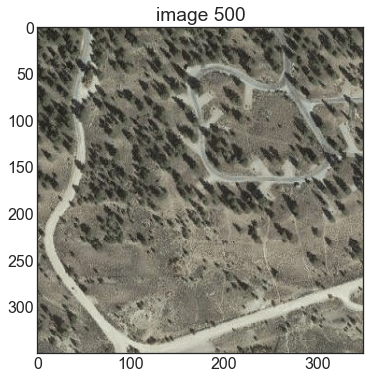

Pulling image 554, total API requests so far = 2920
satimg_CO_554_Established Campground_17_38.073433_-102.935096.png
waiting for: 2 seconds
Pulling image 575, total API requests so far = 2921
satimg_CO_575_Established Campground_17_38.207377_-105.44986100000001.png
waiting for: 1 seconds
Pulling image 664, total API requests so far = 2922
satimg_CO_664_Established Campground_17_39.14228_-106.895601.png
waiting for: 3 seconds
Pulling image 665, total API requests so far = 2923
satimg_CO_665_Established Campground_17_39.129186_-106.901945.png
waiting for: 5 seconds
Pulling image 671, total API requests so far = 2924
satimg_CO_671_Established Campground_17_38.913905_-107.03268600000001.png
waiting for: 2 seconds
Pulling image 675, total API requests so far = 2925
satimg_CO_675_Established Campground_17_38.455581_-107.326821.png
waiting for: 2 seconds
Pulling image 676, total API requests so far = 2926
satimg_CO_676_Established Campground_17_38.545479_-107.68964.png
waiting for: 3 seconds

waiting for: 3 seconds
Pulling image 2102, total API requests so far = 2977
satimg_CO_2102_Established Campground_17_38.11139_-108.18981299999999.png
waiting for: 3 seconds
Pulling image 2122, total API requests so far = 2978
satimg_CO_2122_Established Campground_17_40.011489000000005_-105.49990600000001.png
waiting for: 3 seconds
Pulling image 2144, total API requests so far = 2979
satimg_CO_2144_Established Campground_17_37.960640000000005_-105.21573000000001.png
waiting for: 5 seconds
Pulling image 2311, total API requests so far = 2980
satimg_CO_2311_Established Campground_17_37.352207_-108.555878.png
waiting for: 1 seconds
Pulling image 2344, total API requests so far = 2981
satimg_CO_2344_Established Campground_17_40.000009000000006_-105.463994.png
waiting for: 4 seconds
Pulling image 2381, total API requests so far = 2982
satimg_CO_2381_Established Campground_17_38.879115999999996_-106.148999.png
waiting for: 4 seconds
Pulling image 2396, total API requests so far = 2983
satimg_

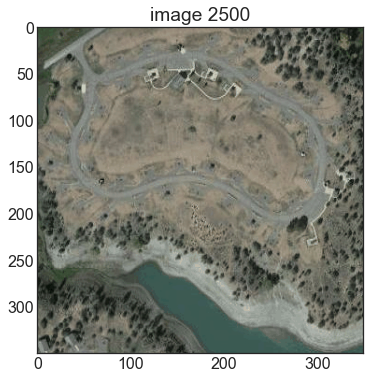

Pulling image 2557, total API requests so far = 2987
satimg_CO_2557_Established Campground_17_40.517631_-108.086675.png
waiting for: 1 seconds
Pulling image 2559, total API requests so far = 2988
satimg_CO_2559_Established Campground_17_39.321203999999994_-105.37311000000001.png
waiting for: 5 seconds
Pulling image 2595, total API requests so far = 2989
satimg_CO_2595_Established Campground_17_38.341364_-104.623048.png
waiting for: 5 seconds
Pulling image 2631, total API requests so far = 2990
satimg_CO_2631_Established Campground_17_39.148643_-106.781103.png
waiting for: 3 seconds
Pulling image 2636, total API requests so far = 2991
satimg_CO_2636_Established Campground_17_38.405558_-106.416697.png
waiting for: 2 seconds
Pulling image 2667, total API requests so far = 2992
satimg_CO_2667_Established Campground_17_39.66368_-107.10343799999998.png
waiting for: 1 seconds
Pulling image 2669, total API requests so far = 2993
satimg_CO_2669_Established Campground_17_37.835_-107.36477.png
wa

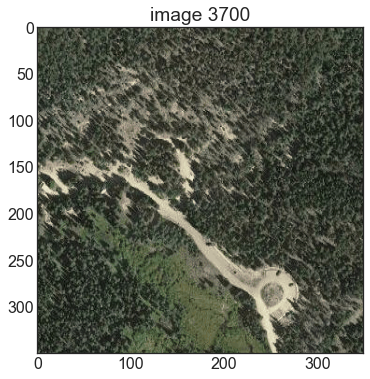

Pulling image 3711, total API requests so far = 3035
satimg_CO_3711_Established Campground_17_40.789758_-106.89171.png
waiting for: 2 seconds
Pulling image 3720, total API requests so far = 3036
satimg_CO_3720_Established Campground_17_37.25331_-105.10958000000001.png
waiting for: 4 seconds
Pulling image 3731, total API requests so far = 3037
satimg_CO_3731_Established Campground_17_39.59702_-106.027102.png
waiting for: 2 seconds
Pulling image 3747, total API requests so far = 3038
satimg_CO_3747_Established Campground_17_40.019681_-106.200969.png
waiting for: 2 seconds
Pulling image 3759, total API requests so far = 3039
satimg_CO_3759_Established Campground_17_38.976172999999996_-105.895407.png
waiting for: 3 seconds
Pulling image 3797, total API requests so far = 3040
satimg_CO_3797_Established Campground_17_40.446483_-108.51285800000001.png
waiting for: 2 seconds
Pulling image 3801, total API requests so far = 3041
satimg_CO_3801_Established Campground_17_37.688874_-105.541214.png


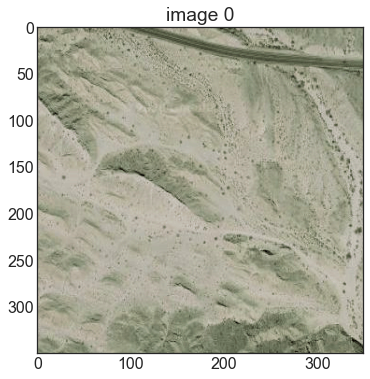

Pulling image 5, total API requests so far = 3044
satimg_CA_5_Established Campground_17_40.995043_-124.114512.png
waiting for: 3 seconds
Pulling image 6, total API requests so far = 3045
satimg_CA_6_Established Campground_17_38.31405_-123.04103899999998.png
waiting for: 4 seconds
Pulling image 7, total API requests so far = 3046
satimg_CA_7_Established Campground_17_32.656484999999996_-117.081546.png
waiting for: 4 seconds
Pulling image 19, total API requests so far = 3047
satimg_CA_19_Established Campground_17_33.246809999999996_-117.27293999999999.png
waiting for: 5 seconds
Pulling image 21, total API requests so far = 3048
satimg_CA_21_Established Campground_17_41.797709999999995_-124.08418.png
waiting for: 4 seconds
Pulling image 27, total API requests so far = 3049
satimg_CA_27_Established Campground_17_35.085569_-120.629674.png
waiting for: 2 seconds
Pulling image 28, total API requests so far = 3050
satimg_CA_28_Established Campground_17_32.635276_-117.14265.png
waiting for: 2 s

waiting for: 2 seconds
Pulling image 338, total API requests so far = 3101
satimg_CA_338_Established Campground_17_33.928566_-118.43443799999999.png
waiting for: 2 seconds
Pulling image 343, total API requests so far = 3102
satimg_CA_343_Established Campground_17_41.16709_-124.12693.png
waiting for: 4 seconds
Pulling image 349, total API requests so far = 3103
satimg_CA_349_Established Campground_17_39.489903000000005_-123.79130900000001.png
waiting for: 1 seconds
Pulling image 372, total API requests so far = 3104
satimg_CA_372_Established Campground_17_40.576105_-124.15033700000001.png
waiting for: 3 seconds
Pulling image 373, total API requests so far = 3105
satimg_CA_373_Established Campground_17_34.578309999999995_-119.959461.png
waiting for: 1 seconds
Pulling image 374, total API requests so far = 3106
satimg_CA_374_Established Campground_17_32.654678000000004_-117.078852.png
waiting for: 5 seconds
Pulling image 375, total API requests so far = 3107
satimg_CA_375_Established Camp

Pulling image 643, total API requests so far = 3157
satimg_CA_643_Established Campground_17_34.878_-119.341.png
waiting for: 4 seconds
Pulling image 644, total API requests so far = 3158
satimg_CA_644_Established Campground_17_35.129087_-120.635196.png
waiting for: 1 seconds
Pulling image 649, total API requests so far = 3159
satimg_CA_649_Established Campground_17_33.402433_-117.602374.png
waiting for: 3 seconds
Pulling image 650, total API requests so far = 3160
satimg_CA_650_Established Campground_17_35.174787_-120.755362.png
waiting for: 4 seconds
Pulling image 651, total API requests so far = 3161
satimg_CA_651_Established Campground_17_34.092165_-116.153348.png
waiting for: 3 seconds
Pulling image 655, total API requests so far = 3162
satimg_CA_655_Established Campground_17_34.392346999999994_-119.520578.png
waiting for: 2 seconds
Pulling image 662, total API requests so far = 3163
satimg_CA_662_Established Campground_17_34.722291999999996_-118.79856399999998.png
waiting for: 3 s

waiting for: 1 seconds
Pulling image 1042, total API requests so far = 3214
satimg_CA_1042_Established Campground_17_32.840568_-117.03368799999998.png
waiting for: 5 seconds
Pulling image 1046, total API requests so far = 3215
satimg_CA_1046_Established Campground_17_32.793535999999996_-117.10151100000002.png
waiting for: 2 seconds
Pulling image 1055, total API requests so far = 3216
satimg_CA_1055_Established Campground_17_36.458385_-116.86313700000001.png
waiting for: 2 seconds
Pulling image 1057, total API requests so far = 3217
satimg_CA_1057_Established Campground_17_35.129359_-118.118022.png
waiting for: 5 seconds
Pulling image 1058, total API requests so far = 3218
satimg_CA_1058_Established Campground_17_39.363839_-122.655573.png
waiting for: 1 seconds
Pulling image 1060, total API requests so far = 3219
satimg_CA_1060_Established Campground_17_33.151839_-116.15380400000001.png
waiting for: 2 seconds
Pulling image 1061, total API requests so far = 3220
satimg_CA_1061_Establishe

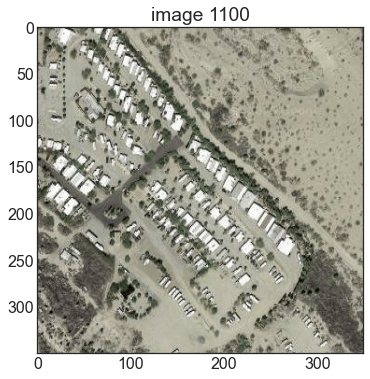

Pulling image 1108, total API requests so far = 3226
satimg_CA_1108_Established Campground_17_33.2728_-116.5447.png
waiting for: 2 seconds
Pulling image 1111, total API requests so far = 3227
satimg_CA_1111_Established Campground_17_41.542716_-124.052282.png
waiting for: 1 seconds
Pulling image 1118, total API requests so far = 3228
satimg_CA_1118_Established Campground_17_34.217819_-118.146286.png
waiting for: 3 seconds
Pulling image 1136, total API requests so far = 3229
satimg_CA_1136_Established Campground_17_37.1299_-118.4124.png
waiting for: 2 seconds
Pulling image 1137, total API requests so far = 3230
satimg_CA_1137_Established Campground_17_37.1258_-118.4333.png
waiting for: 5 seconds
Pulling image 1138, total API requests so far = 3231
satimg_CA_1138_Established Campground_17_37.1289_-118.4212.png
waiting for: 5 seconds
Pulling image 1142, total API requests so far = 3232
satimg_CA_1142_Established Campground_17_33.478327_-115.89165200000001.png
waiting for: 4 seconds
Pulling

Pulling image 1542, total API requests so far = 3282
satimg_CA_1542_Established Campground_17_40.745849_-123.063923.png
waiting for: 1 seconds
Pulling image 1544, total API requests so far = 3283
satimg_CA_1544_Established Campground_17_41.794489_-124.074481.png
waiting for: 4 seconds
Pulling image 1545, total API requests so far = 3284
satimg_CA_1545_Established Campground_17_39.902978999999995_-121.02500400000001.png
waiting for: 1 seconds
Pulling image 1554, total API requests so far = 3285
satimg_CA_1554_Established Campground_17_40.991939_-122.69837700000001.png
waiting for: 5 seconds
Pulling image 1560, total API requests so far = 3286
satimg_CA_1560_Established Campground_17_34.691415_-119.13337.png
waiting for: 4 seconds
Pulling image 1564, total API requests so far = 3287
satimg_CA_1564_Established Campground_17_39.749905_-122.925973.png
waiting for: 3 seconds
Pulling image 1565, total API requests so far = 3288
satimg_CA_1565_Established Campground_17_39.728943_-122.845954.pn

In [ ]:
for name, state in zip(names, state_dfs):
    for category in categories:
        print(category)
        tempdf = state[state['Category'] == category]
        #tempdf.info()
        print(name)
        download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix=f'{name}', out_path=f"data/sat_images/sites_{name}/{category}/")